The first step is to import all the necessary libraries that we will use throughout the notebook. These libraries include stempeg for reading the stems, librosa for audio processing, and matplotlib for plotting the spectrograms.

In [2]:
# Import necessary libraries
import stempeg
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

In this step, we will load a mixture (the full song) and its associated stems (the individual tracks, like vocals, drums, etc.) using stempeg.

We'll specify the file path to the .stem.mp4 file, which contains the mixture and its associated tracks.

In [3]:
# Load the audio file (mixture + stems) from the dataset
mixture_path = '/kaggle/input/musdb18-music-source-separation-dataset/train/Bill Chudziak - Children Of No-one.stem.mp4'

# Load the stems from the file
stems, rate = stempeg.read_stems(mixture_path)

# Display details about the loaded stems
print(f"Loaded {stems.shape[0]} stems at {rate} Hz")

Loaded 5 stems at 44100 Hz


In this step, we'll visualize the waveforms of the mixture (full song) and the vocal stem (isolated vocals). This will help us confirm that the data was loaded correctly and that the vocal stem is distinct from the other tracks.

We will use matplotlib to plot the waveforms for comparison.

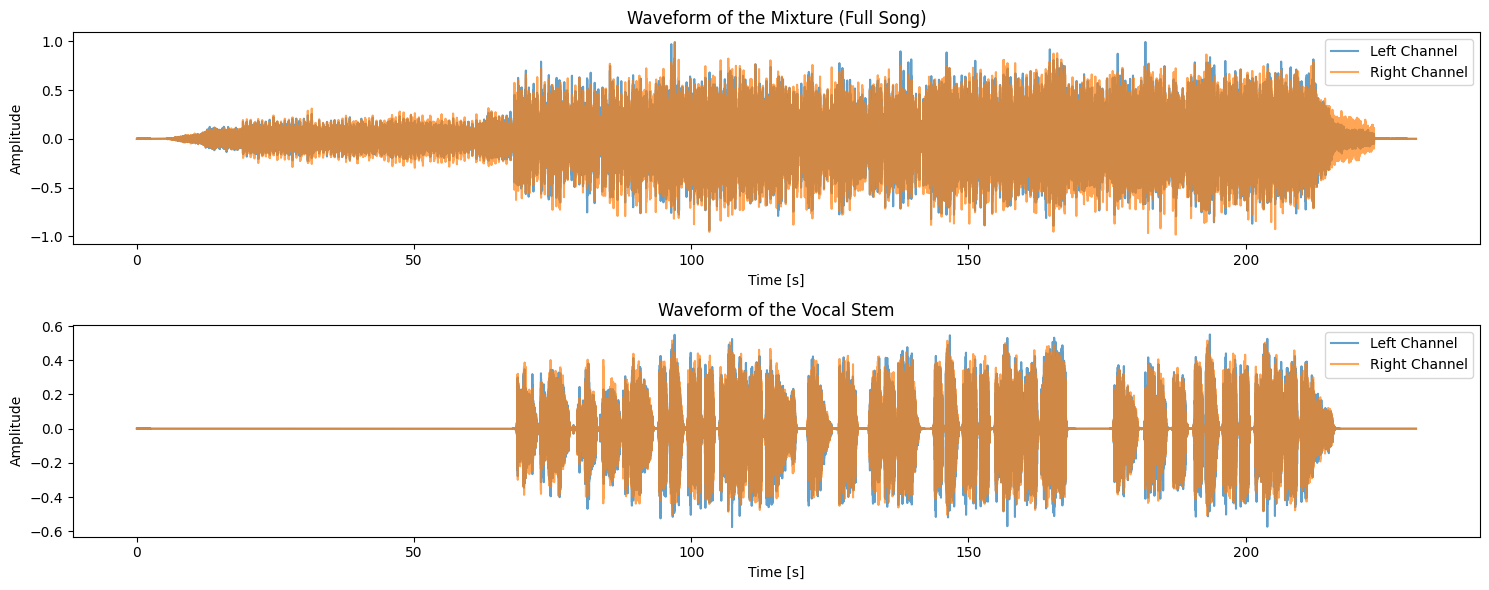

In [4]:
import matplotlib.pyplot as plt

# Extract the mixture and vocal stem from the stems array
mixture = stems[0]  # Mixture (index 0)
vocal_stem = stems[4]  # Vocals (index 4)

# Time axis for the waveform (in seconds)
time = np.arange(mixture.shape[0]) / rate

# Plot the waveforms for the mixture and the vocal stem
plt.figure(figsize=(15, 6))

# Plot the mixture (both stereo channels)
plt.subplot(2, 1, 1)
plt.plot(time, mixture[:, 0], label="Left Channel", alpha=0.7)
plt.plot(time, mixture[:, 1], label="Right Channel", alpha=0.7)
plt.title('Waveform of the Mixture (Full Song)')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.legend()

# Plot the vocal stem (both stereo channels)
plt.subplot(2, 1, 2)
plt.plot(time, vocal_stem[:, 0], label="Left Channel", alpha=0.7)
plt.plot(time, vocal_stem[:, 1], label="Right Channel", alpha=0.7)
plt.title('Waveform of the Vocal Stem')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()

Now that we have successfully visualized the waveforms of the mixture and the vocal stem, the next step will be to generate and display the spectrogram of the mixture and the vocal stem. This will give us insight into the frequency content over time, and is crucial for analyzing the audio data in source separation tasks.

We'll use librosa to compute the spectrograms of both the mixture and the vocal stem. The spectrogram will display the frequency content of the audio over time.

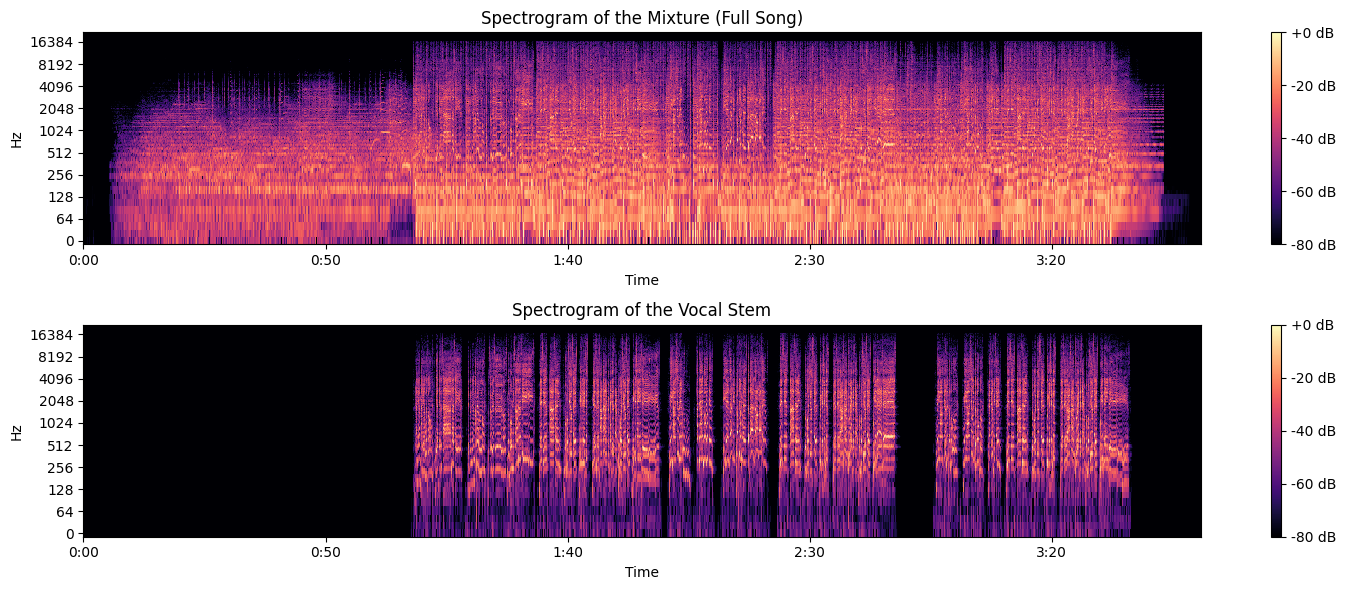

In [6]:
import librosa.display

# Compute the spectrogram of the mixture and the vocal stem
mixture_spectrogram = librosa.amplitude_to_db(np.abs(librosa.stft(mixture[:, 0])), ref=np.max)
vocal_spectrogram = librosa.amplitude_to_db(np.abs(librosa.stft(vocal_stem[:, 0])), ref=np.max)

# Create a plot with 2 subplots: one for the mixture and one for the vocal stem
plt.figure(figsize=(15, 6))

# Plot the spectrogram of the mixture
plt.subplot(2, 1, 1)
librosa.display.specshow(mixture_spectrogram, x_axis='time', y_axis='log', sr=rate)
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram of the Mixture (Full Song)')

# Plot the spectrogram of the vocal stem
plt.subplot(2, 1, 2)
librosa.display.specshow(vocal_spectrogram, x_axis='time', y_axis='log', sr=rate)
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram of the Vocal Stem')

# Show the plots
plt.tight_layout()
plt.show()